<a href="https://colab.research.google.com/github/chav120/Personal-Loan-Data-for-Final-Project/blob/main/Final_Chavez_Joseph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score)

# Link to dataset: https://www.kaggle.com/teertha/personal-loan-modeling
# Link to Github repo: 
# Link to blog: 

frame = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
print(frame)

        ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]


In [2]:
frame.drop(['ID','Securities Account','CD Account', 'Online', 'CreditCard'],axis = 1, inplace = True)
print(frame.head())
print("")
print(frame.shape)
print("")
print(frame.isnull().sum())
print("")
print(frame.columns.values)
print("")
frame.fillna(value=0, method=None, axis=None, inplace=True, limit=None, downcast=None)

   Age  Experience  Income  ZIP Code  ...  CCAvg  Education  Mortgage  Personal Loan
0   25           1      49     91107  ...    1.6          1         0              0
1   45          19      34     90089  ...    1.5          1         0              0
2   39          15      11     94720  ...    1.0          1         0              0
3   35           9     100     94112  ...    2.7          2         0              0
4   35           8      45     91330  ...    1.0          2         0              0

[5 rows x 9 columns]

(5000, 9)

Age              0
Experience       0
Income           0
ZIP Code         0
Family           0
CCAvg            0
Education        0
Mortgage         0
Personal Loan    0
dtype: int64

['Age' 'Experience' 'Income' 'ZIP Code' 'Family' 'CCAvg' 'Education'
 'Mortgage' 'Personal Loan']



In [3]:
bankColumns = ["Age", "Experience", "Income", "ZIP Code", "Family", "CCAvg", "Education", "Mortgage"]
frame2 = pd.get_dummies(frame, columns=bankColumns)
print(frame2.head())

X = frame2.iloc[:, 1:]
y = frame2.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

   Personal Loan  Age_23  Age_24  ...  Mortgage_612  Mortgage_617  Mortgage_635
0              0       0       0  ...             0             0             0
1              0       0       0  ...             0             0             0
2              0       0       0  ...             0             0             0
3              0       0       0  ...             0             0             0
4              0       0       0  ...             0             0             0

[5 rows x 1184 columns]
(3500, 1183)
(3500,)
(1500, 1183)
(1500,)



The accuracy score is 0.9406666666666667

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1353
           1       0.95      0.41      0.58       147

    accuracy                           0.94      1500
   macro avg       0.95      0.71      0.77      1500
weighted avg       0.94      0.94      0.93      1500


[[1350    3]
 [  86   61]]


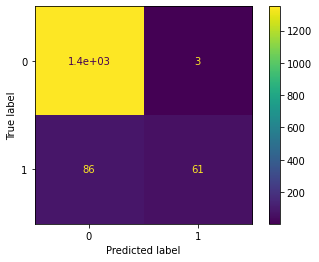

[0.5 0. ]
0.20000000000000004
[0.34545455 0.34545455]
0.13636363636363638


In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("")
print("The accuracy score is", metrics.accuracy_score(y_test, y_pred))
print("")
print(metrics.classification_report(y_test, y_pred))
print("")

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])
print(reg.coef_)
print(reg.intercept_)

from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])
print(reg.coef_)
print(reg.intercept_)

[[1353    0]
 [ 142    5]]


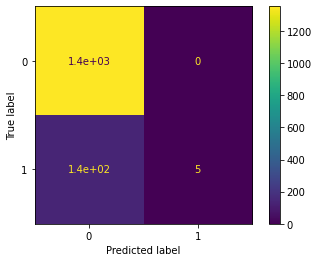

Accuracy on Training partition: 0.9168571428571428
Accuracy on Testing partition: 0.9053333333333333


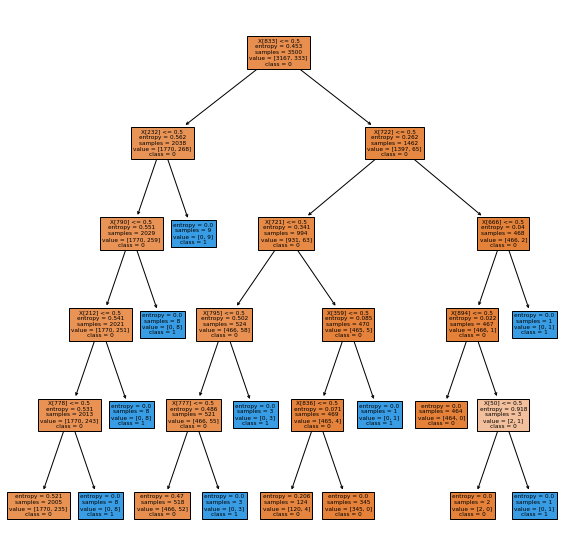

          Column  Importance
833  Education_1    0.216012
721     Family_1    0.130870
232   Income_182    0.097301
 


In [5]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=2020, max_depth=5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

training_pred = dt.predict(X_train)
acc_training = accuracy_score(training_pred, y_train)
print("Accuracy on Training partition:",acc_training)

acc_testing = accuracy_score(y_pred, y_test)
print("Accuracy on Testing partition:",acc_testing)

from sklearn import tree
plt.figure(figsize=(10,10))
classList = list(map(str,dt.classes_.tolist()))
tree = tree.plot_tree(dt, class_names=classList, filled=True)
plt.show()

importance = pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
importance = importance.rename(columns={0: "Column", 1: "Importance"})
importance = importance.sort_values(by=["Importance"], ascending=False)
print(importance[0:3])
print(" ")

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.9406666666666667


In [7]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
print("Precision Score =", precision_rf)

feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
print(df[0:3])

Precision Score = 0.9
        features  importance
833  Education_1    0.020892
721     Family_1    0.014751
834  Education_2    0.014591


In [9]:
from sklearn.ensemble import AdaBoostClassifier
base_est = DecisionTreeClassifier(max_depth = 4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
res = round(recall_score(y_test, ada_boost.predict(X_test)),4)
print("Recall Score =", res)

Recall Score = 0.5238
